# Лабораторная работа 1. Деревья классификации
Задача: 12. Revenue

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import *

%matplotlib inline

/home/conda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/conda/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/conda/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

In [2]:
data = pd.read_csv('revenue.csv', skipinitialspace=True, )

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,<=50K
1,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
2,20,Private,148294,Some-college,10,Never-married,Other-service,Own-child,White,Male,40,United-States,<=50K
3,50,Private,168212,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,65,United-States,>50K
4,38,State-gov,343642,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,40,United-States,>50K


In [4]:
data.rename(columns={n:n.strip() for n in data.columns}, inplace=True)
for c in data.columns:
    if data[c].dtype != np.dtype('O'): continue
    data[c] = data[c].str.strip()

In [5]:
data.rename(columns={'sex': 'male'}, inplace=True)

In [6]:
data['male'] = 1 * (data['male'] == 'Male')

In [7]:
data['income'].value_counts()

<=50K    733
>50K     268
Name: income, dtype: int64

In [8]:
data['income_gt50'] = 1 * (data['income'] == '>50K')

In [9]:
X, y = data.iloc[:, :-1].drop('income', axis=1), data['income']

In [10]:
y.describe()

count      1001
unique        2
top       <=50K
freq        733
Name: income, dtype: object

In [11]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,male,hours-per-week,native-country
0,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States
1,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,50,United-States
2,20,Private,148294,Some-college,10,Never-married,Other-service,Own-child,White,1,40,United-States
3,50,Private,168212,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,1,65,United-States
4,38,State-gov,343642,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,0,40,United-States


In [12]:
X.race.value_counts()

White                 849
Black                 111
Asian-Pac-Islander     32
Amer-Indian-Eskimo      6
Other                   3
Name: race, dtype: int64

In [13]:
X.workclass.value_counts()

Private             684
Self-emp-not-inc     74
Local-gov            67
?                    61
Self-emp-inc         45
State-gov            40
Federal-gov          29
Without-pay           1
Name: workclass, dtype: int64

In [14]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'male',
       'hours-per-week', 'native-country'],
      dtype='object')

In [15]:
cat_feats = ['workclass', 'education', 'marital-status',
             'occupation', 'relationship', 'race', 'native-country']
lencs = dict()
bnrzs = dict()
bnrzd = dict()

In [16]:
for f in cat_feats:
    lencs[f] = preprocessing.LabelEncoder().fit(X[f])
    X.loc[:,f] = lencs[f].transform(X[f])
    bnrzs[f] = preprocessing.LabelBinarizer().fit(X.loc[:,f])
    bnrzd[f] = bnrzs[f].transform(X[f])
    bnrzd[f] = pd.DataFrame(bnrzd[f], columns=[X[f].name + str(n) for n in bnrzs[f].classes_])

X.drop(cat_feats, axis=1, inplace=True)
X = pd.concat([X] + list(bnrzd.values()), axis=1)

In [17]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'male', 'hours-per-week',
       'workclass0', 'workclass1', 'workclass2', 'workclass3', 'workclass4',
       'workclass5', 'workclass6', 'workclass7', 'education0', 'education1',
       'education2', 'education3', 'education4', 'education5', 'education6',
       'education7', 'education8', 'education9', 'education10', 'education11',
       'education12', 'education13', 'education14', 'marital-status0',
       'marital-status1', 'marital-status2', 'marital-status3',
       'marital-status4', 'marital-status5', 'marital-status6', 'occupation0',
       'occupation1', 'occupation2', 'occupation3', 'occupation4',
       'occupation5', 'occupation6', 'occupation7', 'occupation8',
       'occupation9', 'occupation10', 'occupation11', 'occupation12',
       'occupation13', 'occupation14', 'relationship0', 'relationship1',
       'relationship2', 'relationship3', 'relationship4', 'relationship5',
       'race0', 'race1', 'race2', 'race3', 'race4', 'nati

In [18]:
chi2score = pd.DataFrame(
    np.c_[(X.columns, *feature_selection.chi2(X, y))],
    columns=['var', 'chi2', 'chi2pval'])
chi2score.sort_values('chi2pval').head(20)

,var,chi2,chi2pval
1,fnlwgt,74419,0
0,age,224.124,1.13973e-50
4,hours-per-week,207.418,5.02591e-47
30,marital-status2,113.538,1.6449e-26
50,relationship0,91.15,1.33184e-21
32,marital-status4,78.8345,6.75382e-19
2,education-num,52.6452,3.99587e-13
9,workclass4,49.7588,1.73857e-12
53,relationship3,48.2619,3.72921e-12
51,relationship1,43.3993,4.46359e-11


In [19]:
chi2feats = chi2score.loc[chi2score['chi2pval'] <= .05, 'var']

In [20]:
X = X[chi2feats]

In [21]:
# Xstd = X.subtract(X.mean()).div(X.std()).fillna(0)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X)
Xstd = ss.transform(X)

In [22]:
from sklearn import cluster

In [23]:
dbclusters = cluster.dbscan(Xstd)
dbclusters.count

<function tuple.count>

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(Xstd)
X2d = pca.transform(Xstd)

In [25]:
from mlxtend import plotting

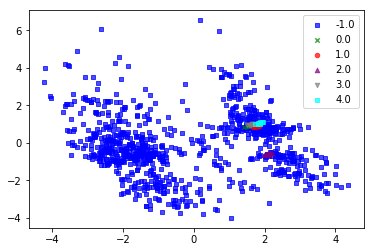

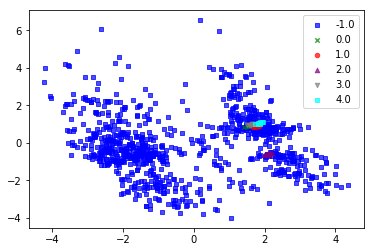

In [26]:
df = np.c_[X2d, dbclusters[1]]
plotting.category_scatter(0, 1, 2, data=df)

In [27]:
display(
    pd.concat((X, pd.DataFrame({'cl': dbclusters[1]})),
              axis=1).groupby('cl').describe().transpose(),
    pd.DataFrame({'y': y, 'cl': dbclusters[1]}).groupby('cl').describe(),
)

cl                           -1          0          1          2          3  \
age           count  959.000000   9.000000   5.000000   9.000000   7.000000   
              mean    39.578728  33.888889  38.000000  39.333333  44.142857   
              std     13.576959   5.301991   3.937004   4.153312   3.287784   
              min     17.000000  25.000000  32.000000  32.000000  39.000000   
              25%     29.000000  32.000000  37.000000  38.000000  42.000000   
              50%     39.000000  33.000000  38.000000  38.000000  45.000000   
              75%     49.000000  38.000000  41.000000  42.000000  46.500000   
              max     90.000000  43.000000  42.000000  46.000000  48.000000   
education-num count  959.000000   9.000000   5.000000   9.000000   7.000000   
              mean    10.148071   9.000000   9.000000  13.000000  10.000000   
              std      2.523165   0.000000   0.000000   0.000000   0.000000   
              min      2.000000   9.000000   9.000000  13.000000  10.000000   
              25%      9.000000   9.000000   9.000000  13.000000  10.000000   
              50%     10.000000   9.000000   9.000000  13.000000  10.000000   
              75%     13.000000   9.000000   9.000000  13.000000  10.000000   
              max     16.000000   9.000000   9.000000  13.000000  10.000000   
education0    count  959.000000   9.000000   5.000000   9.000000   7.000000   
              mean     0.039625   0.000000   0.000000   0.000000   0.000000   
              std      0.195177   0.000000   0.000000   0.000000   0.000000   
              min      0.000000   0.000000   0.000000   0.000000   0.000000   
              25%      0.000000   0.000000   0.000000   0.000000   0.000000   
              50%      0.000000   0.000000   0.000000   0.000000   0.000000   
              75%      0.000000   0.000000   0.000000   0.000000   0.000000   
              max      1.000000   0.000000   0.000000   0.000000   0.000000   
education1    count  959.000000   9.000000   5.000000   9.000000   7.000000   
              mean     0.036496   0.000000   0.000000   0.000000   0.000000   
              std      0.187619   0.000000   0.000000   0.000000   0.000000   
              min      0.000000   0.000000   0.000000   0.000000   0.000000   
              25%      0.000000   0.000000   0.000000   0.000000   0.000000   
              50%      0.000000   0.000000   0.000000   0.000000   0.000000   
...                         ...        ...        ...        ...        ...   
relationship4 std      0.303056   0.000000   0.000000   0.000000   0.000000   
              min      0.000000   0.000000   0.000000   0.000000   0.000000   
              25%      0.000000   0.000000   0.000000   0.000000   0.000000   
              50%      0.000000   0.000000   0.000000   0.000000   0.000000   
              75%      0.000000   0.000000   0.000000   0.000000   0.000000   
              max      1.000000   0.000000   0.000000   0.000000   0.000000   
relationship5 count  959.000000   9.000000   5.000000   9.000000   7.000000   
              mean     0.052138   0.000000   0.000000   0.000000   0.000000   
              std      0.222421   0.000000   0.000000   0.000000   0.000000   
              min      0.000000   0.000000   0.000000   0.000000   0.000000   
              25%      0.000000   0.000000   0.000000   0.000000   0.000000   
              50%      0.000000   0.000000   0.000000   0.000000   0.000000   
              75%      0.000000   0.000000   0.000000   0.000000   0.000000   
              max      1.000000   0.000000   0.000000   0.000000   0.000000   
workclass0    count  959.000000   9.000000   5.000000   9.000000   7.000000   
              mean     0.063608   0.000000   0.000000   0.000000   0.000000   
              std      0.244181   0.000000   0.000000   0.000000   0.000000   
              min      0.000000   0.000000   0.000000   0.000000   0.000000   
              25%      0.000000   0.000000   0.000

y                   
   count unique    top freq
cl                         
-1   959      2  <=50K  708
 0     9      2  <=50K    7
 1     5      2  <=50K    4
 2     9      2   >50K    6
 3     7      2  <=50K    4
 4    12      2  <=50K    7

In [28]:
kmns = cluster.k_means(Xstd, n_clusters=3)

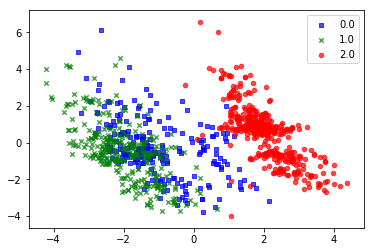

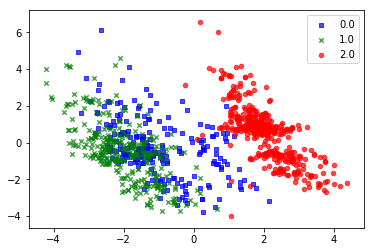

In [29]:
df[:, 2] = kmns[1]
plotting.category_scatter(0, 1, 2, df)

In [30]:
X['kmeans'] = kmns[1]
display(X.groupby('kmeans').describe().transpose())

kmeans                        0           1           2
age           count  239.000000  320.000000  442.000000
              mean    45.075314   28.856250   44.588235
              std     12.506913    9.296473   11.576528
              min     19.000000   17.000000   21.000000
              25%     36.000000   22.000000   36.000000
              50%     44.000000   27.000000   44.000000
              75%     52.000000   34.000000   52.000000
              max     90.000000   68.000000   90.000000
education-num count  239.000000  320.000000  442.000000
              mean     9.836820   10.034375   10.386878
              std      2.527692    2.199046    2.647398
              min      2.000000    3.000000    2.000000
              25%      9.000000    9.000000    9.000000
              50%      9.000000   10.000000   10.000000
              75%     12.000000   12.000000   13.000000
              max     16.000000   15.000000   16.000000
education0    count  239.000000  320.000000  442.000000
              mean     0.029289    0.050000    0.033937
              std      0.168968    0.218286    0.181271
              min      0.000000    0.000000    0.000000
              25%      0.000000    0.000000    0.000000
              50%      0.000000    0.000000    0.000000
              75%      0.000000    0.000000    0.000000
              max      1.000000    1.000000    1.000000
education1    count  239.000000  320.000000  442.000000
              mean     0.033473    0.059375    0.018100
              std      0.180245    0.236695    0.133463
              min      0.000000    0.000000    0.000000
              25%      0.000000    0.000000    0.000000
              50%      0.000000    0.000000    0.000000
...                         ...         ...         ...
relationship4 std      0.466674    0.253425    0.000000
              min      0.000000    0.000000    0.000000
              25%      0.000000    0.000000    0.000000
              50%      0.000000    0.000000    0.000000
              75%      1.000000    0.000000    0.000000
              max      1.000000    1.000000    0.000000
relationship5 count  239.000000  320.000000  442.000000
              mean     0.209205    0.000000    0.000000
              std      0.407595    0.000000    0.000000
              min      0.000000    0.000000    0.000000
              25%      0.000000    0.000000    0.000000
              50%      0.000000    0.000000    0.000000
              75%      0.000000    0.000000    0.000000
              max      1.000000    0.000000    0.000000
workclass0    count  239.000000  320.000000  442.000000
              mean     0.079498    0.087500    0.031674
              std      0.271082    0.283009    0.175330
              min      0.000000    0.000000    0.000000
              25%      0.000000    0.000000    0.000000
              50%      0.000000    0.000000    0.000000
              75%      0.000000    0.000000    0.000000
              max      1.000000    1.000000    1.000000
workclass4    count  239.000000  320.000000  442.000000
              mean     0.025105    0.006250    0.083710
              std      0.156771    0.078933    0.277267
              min      0.000000    0.000000    0.000000
              25%      0.000000    0.000000    0.000000
              50%      0.000000    0.000000    0.000000
              75%      0.000000    0.000000    0.000000
              max      1.000000    1.000000    1.000000

[272 rows x 3 columns]

In [31]:
pd.DataFrame({'y': y, 'cl': kmns[1]}).groupby('cl').describe()

y                   
   count unique    top freq
cl                         
0    239      2  <=50K  194
1    320      2  <=50K  304
2    442      2  <=50K  235

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=8)
Xtr, Xte, ytr, yte = train_test_split(X, y, train_size=.8)
knn.fit(Xtr, ytr)

/home/conda/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [33]:
yp = knn.predict(X)

In [34]:
from sklearn import metrics

In [35]:
print(metrics.classification_report(y, yp))

             precision    recall  f1-score   support

      <=50K       0.75      0.97      0.85       733
       >50K       0.62      0.12      0.19       268

avg / total       0.72      0.74      0.67      1001



In [36]:
pd.DataFrame(metrics.confusion_matrix(y, knn.predict(X)),
             columns=['predicted 0', 'predicted 1'],
             index=['actual 0', 'actual 1'])

,predicted 0,predicted 1
actual 0,714,19
actual 1,237,31


In [37]:
pd.DataFrame(metrics.confusion_matrix(ytr, knn.predict(Xtr)),
             columns=['predicted 0', 'predicted 1'],
             index=['actual 0', 'actual 1'])

,predicted 0,predicted 1
actual 0,568,12
actual 1,194,26


In [38]:
pd.DataFrame(metrics.confusion_matrix(yte, knn.predict(Xte)),
             columns=['predicted 0', 'predicted 1'],
             index=['actual 0', 'actual 1'])

,predicted 0,predicted 1
actual 0,146,7
actual 1,43,5


In [42]:
import scipy as sp